In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

from run import run
from run import state
from sample import material
# from 

from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import time
import pickle


In [18]:
from os import listdir
from os.path import isfile, join
mypath = "results/"
files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith("pickle")]
files.sort()

In [19]:
i = 0
for filename in files:
    
    with open('results/'+filename, 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
        data = pickle.load(f)
#     print(str(i)+"  "+filename)
#     print("Start:", data.bias_V[0])
#     print("Finish:", data.bias_V[-1], data.bias_V[-2],)
    i = i+ 1

    
fileDisplay = []    
for i in range(len(files)):
    fileDisplay.append(str(i)+"    "+files[i])
    


In [20]:
w = widgets.SelectMultiple(
    options=fileDisplay,
    description='Files',
    layout=widgets.Layout(width="45%")
)
display(w)

SelectMultiple(description='Files', layout=Layout(width='45%'), options=('0    p-nGan-20200331-1120.pickle', '…

In [21]:
filesSelected = []

for fileChosen in w.value:
    for val, filename in enumerate(files):
        if(filename in fileChosen):
            filesSelected.append(files[val])

            
print(filesSelected)

initialVariable = 0
for selected in filesSelected:
    with open('results/'+selected, 'rb') as f:
        data = pickle.load(f)
        
    if(initialVariable == 0):
        dataCompiled = run(0,data.workbench)
        mat = data.workbench.material
        wb = data.workbench
        initialVariable = 1
    dataCompiled.merge(data)


    
print(mat.name)
    

print((dataCompiled.bias_j))   


['p-nGan-20200331-1132.pickle']
self.states 19
GaN
[-3.94066563e-43 -1.91526853e-41 -9.12111606e-40 -4.34191761e-38
 -2.06685591e-36 -9.83869470e-35 -4.68342255e-33 -2.22939785e-31
 -1.06123107e-29 -5.05161443e-28 -2.40462826e-26 -1.14462384e-24
 -5.44846535e-23 -2.59347165e-21 -1.23447950e-19 -5.87597902e-18
 -2.79684976e-16 -1.33121642e-14 -6.33601454e-13]


In [22]:
N = wb.sample.N
mu_p = mat.mu_p
mu_n = mat.mu_n
epsilon_s = mat.epsilon_s
L = wb.sample.L
U_T = wb.sample.U_T
E_c = mat.E_c
E_v = mat.E_v
N_v = mat.N_v
N_c = mat.N_c
kT = wb.sample.kT
j_cop = wb.j_cop
j_con = wb.j_con
tau_p = mat.tau_p
tau_n = mat.tau_n
n_t = wb.n_t
p_t = wb.p_t
r_srh_con  = wb.r_srh_con
r_srh_cop = wb.r_srh_cop
N_I = wb.N_I


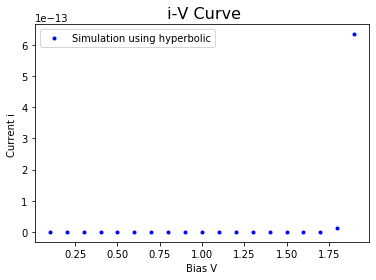

In [23]:
from scipy import stats

    

     
i = 0
t = 10
bias_j1 = np.zeros(len(dataCompiled.states))

j_ratio_1 = np.zeros(len(dataCompiled.states))
bias_V = np.zeros(len(dataCompiled.states))
for sta in dataCompiled.states:
#     bias_j1[i] = np.mean((data.workbench.j_con*sta.j_n[:4]) + data.workbench.j_cop*sta.j_p[0:4])   
#     bias_j1[i] = sta.bias_j   

#     print(j_con*sta.j_n + j_cop*sta.j_p)
#     j_ratio_1[i] = np.mean(data.workbench.j_con*sta.j_n[t:N-t]/(j_cop*sta.j_p[t:N-t]))
    bias_V[i] = sta.bias
#     print(j_con*sta.j_n + j_cop*sta.j_p)
    i+=1
    


bias_j = dataCompiled.bias_j
# bias_j = dataCompiled.bias_j
# bias_j = bias_j*200*10**-14

j_ratio = j_ratio_1

#### This bit is only for the plots I will be doing. 
# for i in range(199,217):
#     print(bias_V[i])
#     bias_V[i] = bias_V[i+1]

mott_gurney_j = (bias_V**2)*(9*mu_p*10**-4*epsilon_s)/(8*((L*10**-6)**3))


plt.title(r" i-V Curve",fontsize=16)
# plt.plot(bias_V, mott_gurney_j, ".g", label = "Mott-Gurney")
plt.plot(bias_V, -bias_j,".b", label =  "Simulation using hyperbolic")
plt.ylabel("Current i ")
plt.xlabel("Bias V")
plt.legend(loc='upper left')
# plt.savefig("plots/comparisons/i-v-with-recomb-100V-regular.png", dpi = 300)

plt.show()


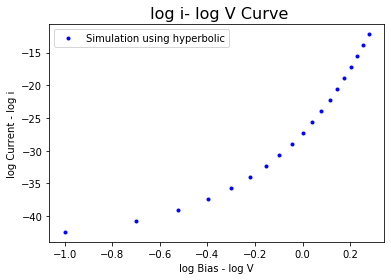

In [24]:
# plt.savefig("plots/i-v-pip-recomb-20V.png", dpi = 300)

plt.title(r" log i- log V Curve",fontsize=16)
# plt.plot(np.log10(bias_V), np.log10(np.abs(mott_gurney_j)),".g", label = "Mott-Gurney")
plt.plot(np.log10(bias_V), np.log10((-bias_j)),".b", label =  "Simulation using hyperbolic")
plt.ylabel("log Current - log i")
plt.xlabel("log Bias - log V")
plt.legend(loc='upper left')
# plt.savefig("plots/comparisons/logi-logv-100V-regular.png", dpi = 300)

plt.show()

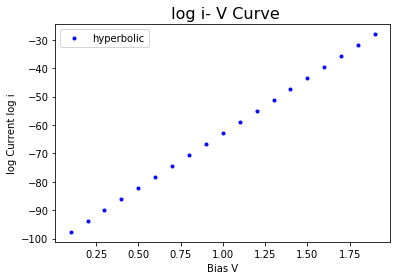

In [25]:
# print(np.log10(bias_V))
plt.title(r" log i- V Curve",fontsize=16)
# plt.plot(bias_V, np.log10(np.abs(mott_gurney_j)),".g", label = "mott-gurney")

plt.plot(bias_V, np.log((-bias_j)),".b", label = "hyperbolic")
# plt.xticks(np.arange(min(bias_V), max(bias_V)+1, 5))

plt.ylabel("log Current log i")
plt.xlabel("Bias V")
plt.legend(loc='upper left')

plt.show()
# plt.savefig("plots/comparisons/logi-v-100V.png", dpi = 300)

# plt.savefig("plots/logi-v-pip.png", dpi = 300)

slope nan
slope 38.62918951547013


/Users/abelthayil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/Users/abelthayil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


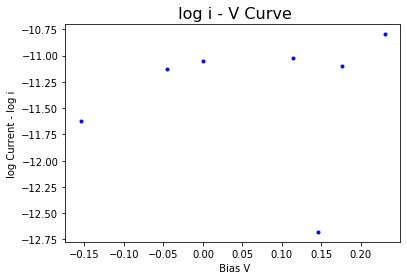

In [22]:
frameLow = 5
frameHigh = 25



# print(np.log(bias_V[frameLow:frameHigh]))
slope1, intercept1, r_value, p_value, std_err = stats.linregress(np.log10(bias_V[frameLow:frameHigh]), np.log10(bias_j[frameLow:frameHigh]))
line1 = slope1*(np.log10(bias_V[frameLow:frameHigh]))+intercept1
print("slope",slope1)
print("slope",1/U_T)

plt.title(r" log i - V Curve",fontsize=16)

plt.plot(np.log10(bias_V[frameLow:frameHigh]), np.log10(bias_j[frameLow:frameHigh]),".b")
plt.plot(np.log10(bias_V[frameLow:frameHigh]), line1)
plt.ylabel("log Current - log i")
plt.xlabel(" Bias V")
plt.show()

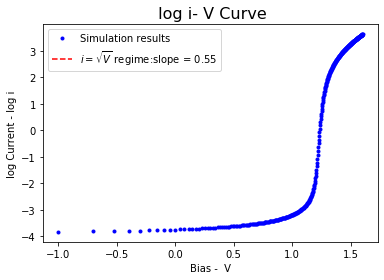

In [66]:
plt.title(r" log i- V Curve",fontsize=16)
line1 = slope1*(np.log10(bias_V))+intercept1
plt.plot(np.log10(bias_V), np.log10(np.abs(bias_j)),".b",label=r'Simulation results')
# plt.plot(np.log10(bias_V), line2, '--',label=r'Mott-Gurney regime:slope = 1.94')
plt.plot(np.log10(bias_V), line1, '--r',label=r'$i = \sqrt{V}$ regime:slope = 0.55')
# plt.ylim(-9.1,-2)
plt.legend(loc='upper left')

plt.ylabel("log Current - log i")
plt.xlabel("Bias -  V")
plt.show()
# plt.savefig("plots/logi-logv-pip.png", dpi = 300)

[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3
 2.4 2.5]
slope nan


/Users/abelthayil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/Users/abelthayil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


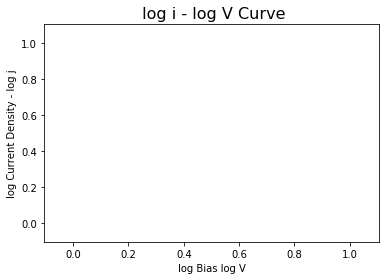

In [67]:
print(bias_V[frameLow:frameHigh])

frameLow = 350
frameHigh = 390
# plt.title(r" log j- V Curve",fontsize=16)

# plt.plot(bias_V, np.log(bias_j),"-b")
# plt.ylabel("Current Density j")
# plt.xlabel("Bias V")
# plt.show()



slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(bias_V[frameLow:frameHigh]), np.log10(bias_j[frameLow:frameHigh]))
line2 = slope*(np.log10(bias_V[frameLow:frameHigh]))+intercept
print("slope",slope)

plt.title(r" log i - log V Curve",fontsize=16)

plt.plot(np.log10(bias_V[frameLow:frameHigh]), np.log10(bias_j[frameLow:frameHigh]),".b")
plt.plot(np.log10(bias_V[frameLow:frameHigh]), line2)
plt.ylabel("log Current Density - log j")
plt.xlabel("log Bias log V")
plt.show()

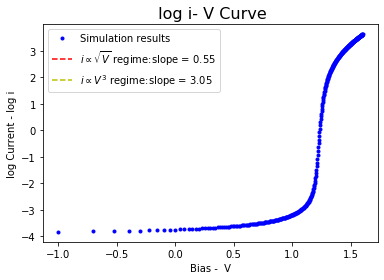

In [68]:
plt.title(r" log i- V Curve",fontsize=16)
line1 = slope1*(np.log10(bias_V))+intercept1
line2 = slope*(np.log10(bias_V))+intercept
plt.plot(np.log10(bias_V), np.log10(np.abs(bias_j)),".b",label=r'Simulation results')
# plt.plot(np.log10(bias_V), line2, '--',label=r'Mott-Gurney regime:slope = 1.94')
plt.plot(np.log10(bias_V), line1, '--r',label=r'$i \propto \sqrt{V}$ regime:slope = 0.55')
plt.plot(np.log10(bias_V), line2, '--y',label=r'$i \propto V^3 $ regime:slope = 3.05')
# plt.ylim(-9.1,-2)
plt.legend(loc='upper left')

plt.ylabel("log Current - log i")
plt.xlabel("Bias -  V")

# plt.savefig("plots/logi-logv-pip.png", dpi = 300)
plt.show()

[35.1 35.2 35.3 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4
 36.5 36.6 36.7 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8
 37.9 38.  38.1 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9 39. ]


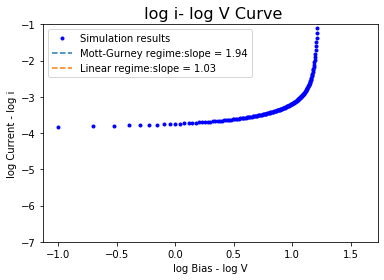

In [69]:
print(bias_V[frameLow:frameHigh])


plt.title(r" log i- log V Curve",fontsize=16)
line2 = slope*(np.log10(bias_V))+intercept
line1 = slope1*(np.log10(bias_V))+intercept1
plt.plot(np.log10(bias_V), np.log10(np.abs(bias_j)),".b",label=r'Simulation results')
plt.plot(np.log10(bias_V), line2, '--',label=r'Mott-Gurney regime:slope = 1.94')
plt.plot(np.log10(bias_V), line1, '--',label=r'Linear regime:slope = 1.03')
plt.ylim(-7,-1)
plt.legend(loc='upper left')

plt.ylabel("log Current - log i")
plt.xlabel("log Bias - log V")
plt.show()

# plt.savefig("plots/mott-gurney-log.png", dpi = 300)

# plt.title(r" j_n/j_p",fontsize=16)

# plt.plot(j_ratio,".b")
# plt.ylabel("log Current Density - log j")
# plt.xlabel("Bias V")
# plt.show()

# print(j_ratio)

# # plt.savefig("results/logj-v.png", dpi = 300)
# print("10V", bias_j[100])
# print("Jratio", j_ratio[100])

In [70]:
#This function plots the potentials and concentrations for a given state

def plot_potentials_and_concentrations(psi, phi_p, phi_n, p, n):
    
    plt.title(r"Potentials at " r"0.1V",fontsize=16)

    plt.plot(-phi_p ,"--g", label=r'$\varphi_p $')
    plt.plot(-phi_n ,"b--", label =r"$\varphi_n $")
    plt.plot( E_c - psi,"k-", label = r"$E_c - \psi $")
    plt.plot( E_v -psi,"r-", label = r"$E_v - \psi$")
    
    p = N_v*np.exp((E_v - psi + phi_p)/kT)
    n = N_c*np.exp((psi - phi_n - E_c)/kT)
    
    plt.ylabel("Potential")
    plt.xlabel("Node number")
    plt.legend(loc='upper right')
    plt.show()
#     plt.savefig("test2.png", dpi = 300)

    plt.title(r"Hole potential" r" $ \varphi_p $",fontsize=16)
    plt.plot(phi_p,"-g")
    plt.ylabel("Potential")
    plt.xlabel("Node number")
    plt.show()

    plt.title(r"Electron potential" r" $ \varphi_n $",fontsize=16)
    plt.plot(phi_n,"b-")
    plt.ylabel("Potential")
    plt.xlabel("Node number")
    plt.show()

    plt.title(r" Hole Concentration" r" $ p(x) $",fontsize=16)
    plt.plot(p,"-g")
    plt.ylabel("Concentration")
    plt.xlabel("Node number")
    plt.show()

    plt.title(r" Electron Concentration" r" $ n(x) $",fontsize=16)
    plt.plot(n,"-b")
    plt.ylabel("Concentration")
    plt.xlabel("Node number")
    plt.show()

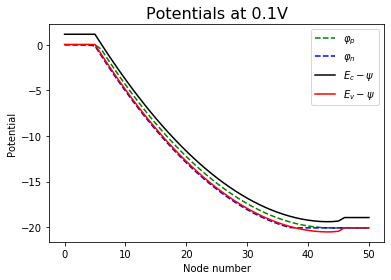

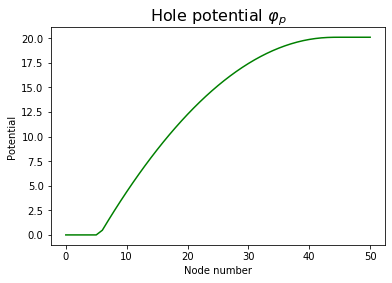

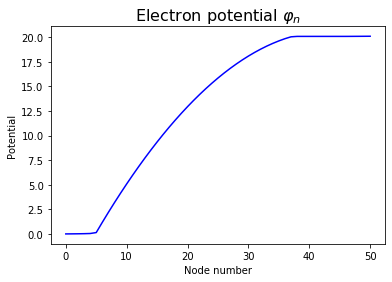

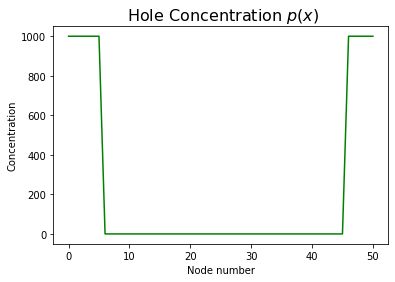

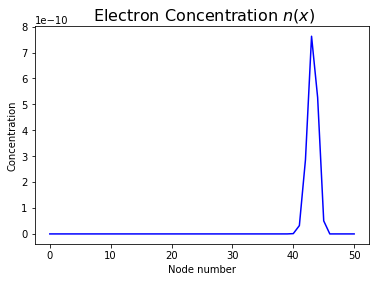

In [71]:
bis = 200
plot_potentials_and_concentrations(dataCompiled.states[bis].psi, dataCompiled.states[bis].phi_p, dataCompiled.states[bis].phi_n, dataCompiled.states[bis].p, dataCompiled.states[bis].n)









In [72]:
def f(bias_V):
    pos = (int(bias_V*10))
    n = (dataCompiled.states[pos-1].n)
    p = (dataCompiled.states[pos-1].p)
    plt.figure(2)
    
    plt.plot(-dataCompiled.states[pos-1].phi_p ,"g", label=r'$\varphi_p $')
    plt.plot(-dataCompiled.states[pos-1].phi_n ,"b", label =r"$\varphi_n $")
    plt.plot( E_c - dataCompiled.states[pos-1].psi,"k-", label = r"$E_c - \psi $")
    plt.plot( 0 -dataCompiled.states[pos-1].psi,"r-", label = r"$E_v - \psi$")
    plt.plot(-dataCompiled.states[pos-1].phi_p +dataCompiled.states[pos-1].psi)


#     p = np.exp((0- psi + phi_p))

    plt.title(r" Potentials",fontsize=16)
#     plt.plot(p[t:N-t-2],"-b")    

    plt.ylabel("Potential (V)")
    plt.xlabel("Node number")
    plt.legend(loc='upper right')

#     plt.ylim(-1,-7)
    plt.show()
    
interactive_plot = interactive(f, bias_V=(min(dataCompiled.bias_V),max(dataCompiled.bias_V)))
# interactive_plot = interactive(f, bias_V=(0.1,5))

output = interactive_plot.children[-1]

output.layout.height = '300px'

interactive_plot


interactive(children=(FloatSlider(value=20.000000000000004, description='bias_V', max=39.900000000000006, min=…

In [73]:
def g(bias_V):
    E_c = 1.12
    pos = (int(bias_V*10))
    n = (dataCompiled.states[pos-1].n)
    p = (dataCompiled.states[pos-1].p)
    plt.figure(2)
    
    plt.plot(np.log10(p),label = r'p - holes')
    plt.plot(np.log10(n),label = r'n - electrons')

#     p = np.exp((0- psi + phi_p))

    plt.title(r" Carrier Concentrations",fontsize=16)
#     plt.plot(p[t:N-t-2],"-b")    

    plt.ylabel("log Concentration")
    plt.xlabel("Node number")
    plt.legend(loc='upper right')
    plt.ylim(-20,5)
    plt.show()
    
interactive_plot = interactive(g, bias_V=(min(dataCompiled.bias_V),max(dataCompiled.bias_V)))
# interactive_plot = interactive(g, bias_V=(0.1,5))

output = interactive_plot.children[-1]

output.layout.height = '300px'

interactive_plot


interactive(children=(FloatSlider(value=20.000000000000004, description='bias_V', max=39.900000000000006, min=…

In [74]:
def h(bias_V):
    E_c = 1.12
    pos = (int(bias_V*10))
    plt.title(r" Current Densities",fontsize=16)
#     plt.plot((j_con*np.abs((dataCompiled.states[pos-1].j_n[:N-1]))),"-b", label = r"Electron Currents $J_n$")
#     print(j_con*np.abs((dataCompiled.states[pos-1].j_n[:N-1]))+j_cop*np.abs((dataCompiled.states[pos-1].j_p[:N-1])))
    plt.plot((j_cop*np.abs((dataCompiled.states[pos-1].j_p[:N-1]))),"-g", label = r"Hole Currents $J_p$")
#     plt.plot((j_con*np.abs((dataCompiled.states[pos-1].j_n[:N-1]))),"-b", label = r"Electron Currents $J_n$")
#     plt.plot(j_cop*np.abs((dataCompiled.states[pos-1].j_p[:N-1])) + j_con*np.abs((dataCompiled.states[pos-1].j_n[:N-1])), label = 'Total')
    plt.ylabel("Log J")
    plt.xlabel("Node number")
    plt.legend(loc='upper left')
    
    const2 = np.mean(j_con*np.abs((dataCompiled.states[pos-1].j_n[:N-1])))
                
#     plt.title(r" j_n",fontsize=16)
#     plt.ylim(const2 - const2*(10**-1), const2 + const2*(10**-1))

    plt.show()
    
#     plt.savefig("plots/comparisons/current-density-1-hyper.png", dpi = 300)
    
interactive_plot = interactive(h, bias_V=(min(dataCompiled.bias_V),max(dataCompiled.bias_V)))
# interactive_plot = interactive(h, bias_V=(0.1,5))

output = interactive_plot.children[-1]
output.layout.height = '400px'

interactive_plot




interactive(children=(FloatSlider(value=20.000000000000004, description='bias_V', max=39.900000000000006, min=…

In [73]:
def recomb(bias_V):
    pos = (int(bias_V*10))

    plt.title(r"Recombination",fontsize=16)
    plt.ylabel("Rate of Recombination"+r" $[time]^-1$")
    plt.xlabel("Length (microns)")

    n = dataCompiled.states[pos-1].n
    p = dataCompiled.states[pos-1].p


    r_srh = 1/(tau_p*(n+n_t) + tau_n*(p+p_t))
    r_srh_n = r_srh_con*r_srh
    r_srh_p = r_srh_cop*r_srh

#     plt.plot((n*p - N_I**2), label = r"Holes")

    plt.plot(r_srh_n*(n*p - N_I**2), label = r"Electrons")
#     plt.legend(loc='upper left')
#     plt.ylim(-1.2*10**-15,4*10**-15)
    plt.show()

interactive_plot = interactive(recomb, bias_V=(min(dataCompiled.bias_V),max(dataCompiled.bias_V)))
# interactive_plot = interactive(recomb, bias_V=(0.1,5))

output = interactive_plot.children[-1]

output.layout.height = '300px'

interactive_plot

interactive(children=(FloatSlider(value=50.0499999999993, description='bias_V', max=99.9999999999986, min=0.1)…